# Amihud's illiquidity index

#### Load data (삼성전자 2004-06-07 ~ )

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('daily_chart_005930.csv', index_col = 0, parse_dates=True)
data.head(5)

,open,high,low,close,volume
date,,,,,
2004-06-07,10900,11750,10900,11600,16338377
2004-06-08,11800,11950,11300,11450,12665550
2004-06-09,11750,12150,11300,11850,15494782
2004-06-10,11900,12300,11650,12000,16000045
2004-06-11,11950,12000,11200,11400,10327592


#### Calculate daily return (전일 종가대비 당일 종가 수익률 계산)

In [36]:
data['return'] = abs(data['close'].pct_change(1).fillna(0))

#### Calculate Price Volume (PV)   (실제 거래대금과 차이 있지만 추정치로 사용하겠음)

In [37]:
data['pricevolume'] = data['close'] * data['volume']

#### Calculate ABS(RETURN) / PV,    ABS(RETURN) /VOLUME

In [38]:
data['return/pv'] = data['return'] / data['pricevolume']
data['return/v'] = data['return'] / data['volume']

#### Finally calculate illiquidity index

In [39]:
D = 40
data['illiq_pv'] = data['return/pv'].rolling(D, min_periods = 1).mean()
data['illiq_v'] = data['return/v'].rolling(D, min_periods = 1).mean()

#### Check data

In [40]:
data.head(5)

,open,high,low,close,volume,return,pricevolume,return/pv,return/v,illiq_pv,illiq_v
date,,,,,,,,,,,
2004-06-07,10900,11750,10900,11600,16338377,0.000000,189525173200,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2004-06-08,11800,11950,11300,11450,12665550,0.012931,145020547500,8.916691e-14,1.020961e-09,4.458346e-14,5.104806e-10
2004-06-09,11750,12150,11300,11850,15494782,0.034934,183613166700,1.902614e-13,2.254598e-09,9.314277e-14,1.091853e-09
2004-06-10,11900,12300,11650,12000,16000045,0.012658,192000540000,6.592808e-14,7.911370e-10,8.633910e-14,1.016674e-09
2004-06-11,11950,12000,11200,11400,10327592,0.050000,117734548800,4.246842e-13,4.841400e-09,1.540081e-13,1.781619e-09


#### Plot Chart

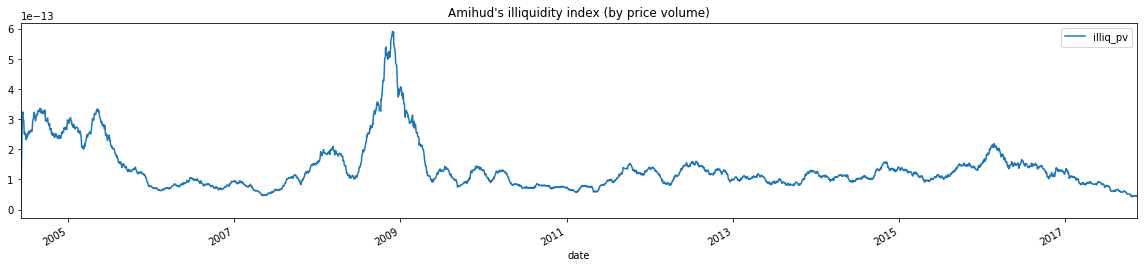

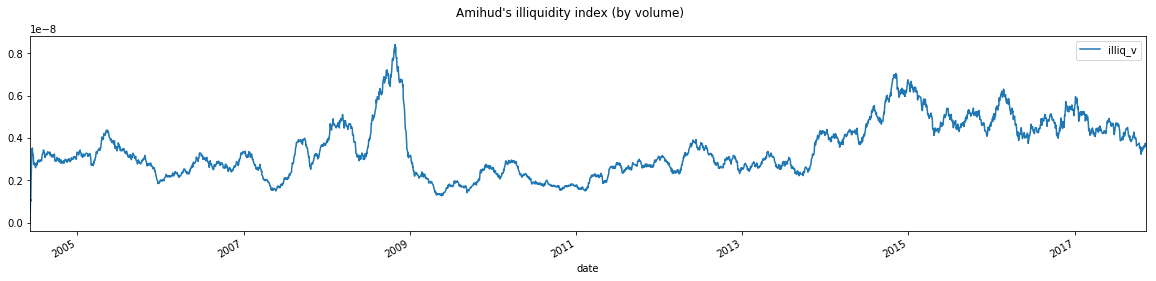

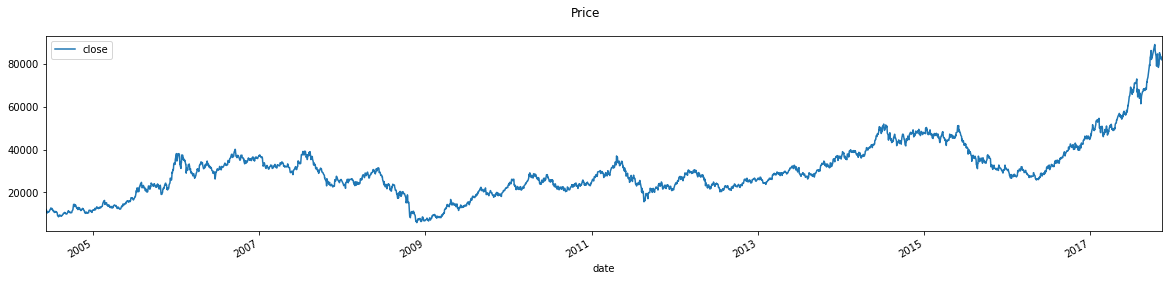

In [41]:
data[['illiq_pv']].plot(figsize=(20,4), legend = True, title="Amihud's illiquidity index (by price volume)")
data[['illiq_v']].plot(figsize=(20,4), legend = True, subplots= True, sharex = True, title="Amihud's illiquidity index (by volume)")
data[['close']].plot(figsize=(20,4), legend = True, subplots= True, sharex = True, title = 'Price')

plt.show()

### How about adapting to micro structure?

In [42]:
# Read csv
data = pd.read_csv('2017-11-09_005930.csv', index_col = 0)

# 동시 호가 체결로 인한 데이터 왜곡 방지
data = data[1:]

# pandas resample 위해 index 를 timedelta 형식으로 전환
data.index = pd.TimedeltaIndex(data.index)

# 10초봉으로 전환
data_ = data['close'].resample('10s').ohlc()
data_['volume'] = abs(data['volume']).resample('10s').sum()

# illiquidity 계산
D = 40
data_['return'] = abs(data_['close'].pct_change(1).fillna(0))
data_['pricevolume'] = data_['close'] * data_['volume']
data_['return/pv'] = data_['return'] / data_['pricevolume']
data_['return/v'] = data_['return'] / data_['volume']
data_['illiq_pv'] = data_['return/pv'].rolling(D, min_periods = 1).mean()
data_['illiq_v'] = data_['return/v'].rolling(D, min_periods = 1).mean()

#### Plot

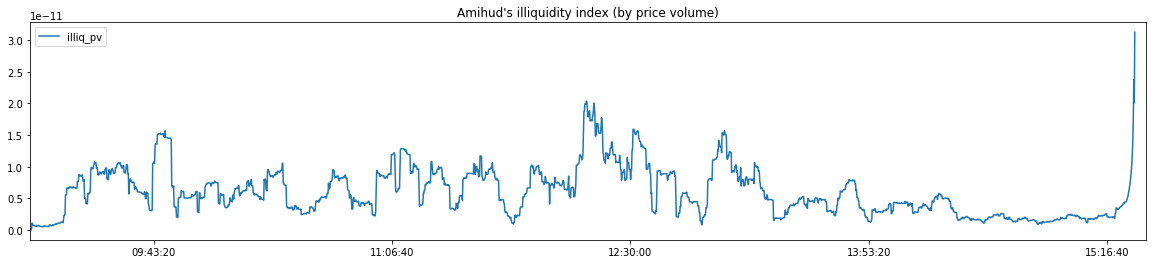

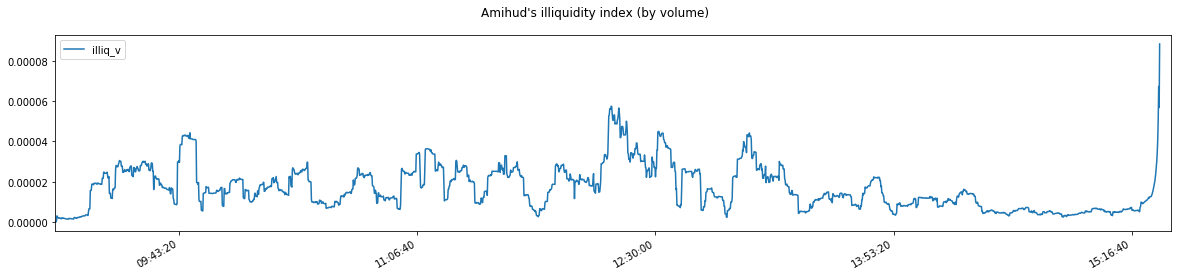

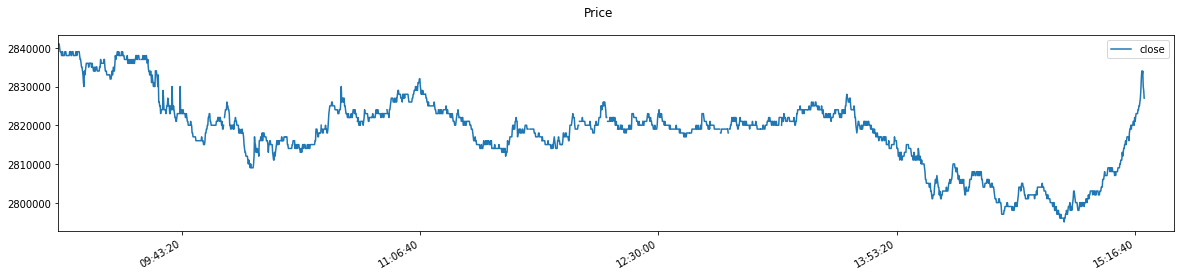

In [43]:
data_[['illiq_pv']].plot(figsize=(20,4), legend = True, title="Amihud's illiquidity index (by price volume)")
data_[['illiq_v']].plot(figsize=(20,4), legend = True, subplots= True, sharex = True, title="Amihud's illiquidity index (by volume)")
data_[['close']].plot(figsize=(20,4), legend = True, subplots= True, sharex = True, title = 'Price')

plt.show()